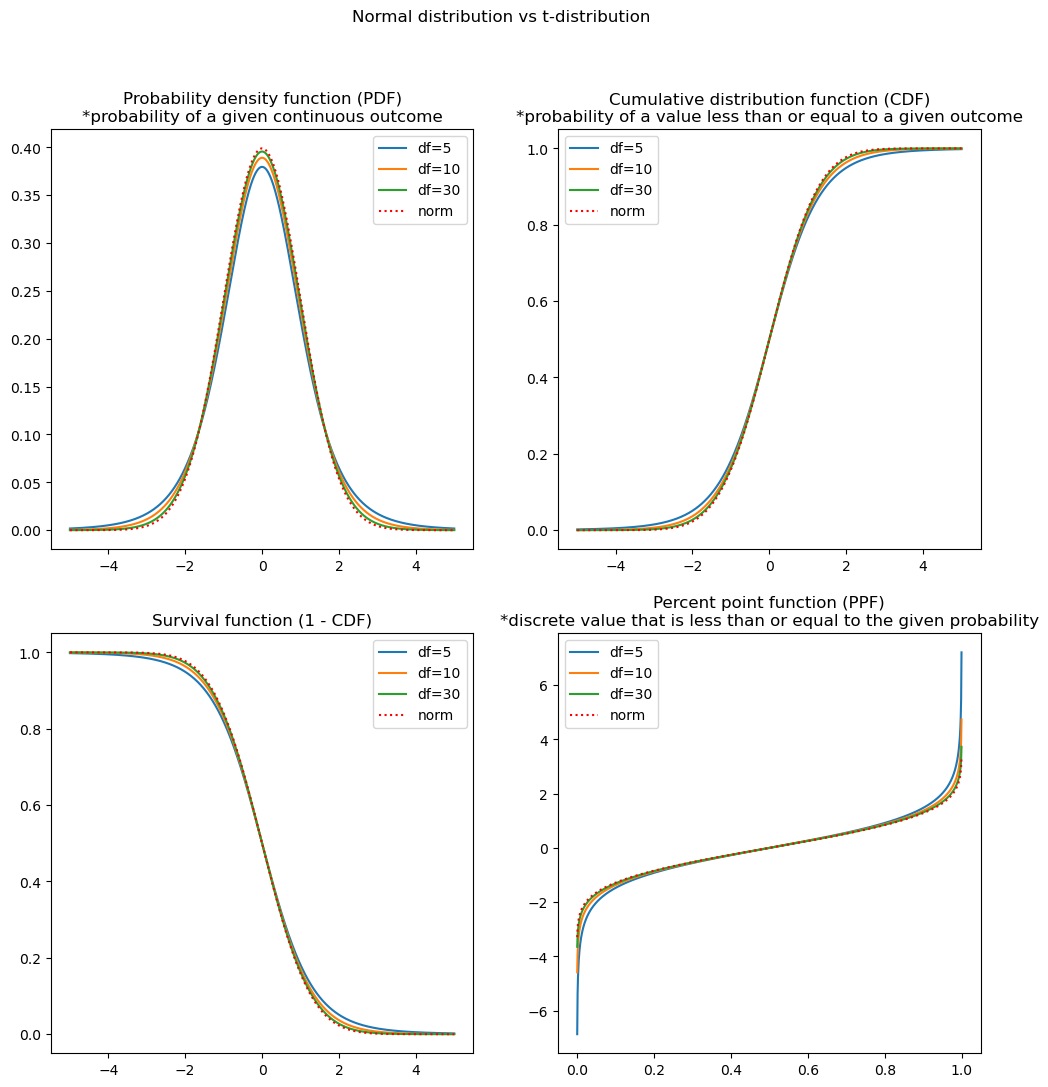

In [349]:
## evaluating t-distribution vs normal distribution
from scipy.stats import t, norm
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 10000)

pdf1, pdf2, pdf3 = t.pdf(x, df=5), t.pdf(x, df=10), t.pdf(x, df=30)
pdf4 = norm.pdf(x)

cdf1, cdf2, cdf3 = t.cdf(x, df=5), t.cdf(x, df=10), t.cdf(x, df=30)
cdf4 = norm.cdf(x)

sf1, sf2, sf3 = t.sf(x, df=5), t.sf(x, df=10), t.sf(x, df=30)
sf4 = norm.sf(x)

ppf1, ppf2, ppf3 = t.ppf(x, df=5), t.ppf(x, df=10), t.ppf(x, df=30)
ppf4 = norm.ppf(x)

figure, axis = plt.subplots(2, 2, figsize=(12, 12))
figure.suptitle('Normal distribution vs t-distribution')

axis[0, 0].set_title('Probability density function (PDF)\n*probability of a given continuous outcome')
axis[0, 0].plot(x, pdf1)
axis[0, 0].plot(x, pdf2)
axis[0, 0].plot(x, pdf3)
axis[0, 0].plot(x, pdf4, 'r:')
axis[0, 0].legend(('df=5', 'df=10', 'df=30', 'norm'))

axis[0, 1].set_title('Cumulative distribution function (CDF)\n*probability of a value less than or equal to a given outcome')
axis[0, 1].plot(x, cdf1)
axis[0, 1].plot(x, cdf2)
axis[0, 1].plot(x, cdf3)
axis[0, 1].plot(x, cdf4, 'r:')
axis[0, 1].legend(('df=5', 'df=10', 'df=30', 'norm'))

axis[1, 0].set_title('Survival function (1 - CDF)')
axis[1, 0].plot(x, sf1)
axis[1, 0].plot(x, sf2)
axis[1, 0].plot(x, sf3)
axis[1, 0].plot(x, sf4, 'r:')
axis[1, 0].legend(('df=5', 'df=10', 'df=30', 'norm'))

axis[1, 1].set_title('Percent point function (PPF)\n*discrete value that is less than or equal to the given probability')
axis[1, 1].plot(x, ppf1)
axis[1, 1].plot(x, ppf2)
axis[1, 1].plot(x, ppf3)
axis[1, 1].plot(x, ppf4, 'r:')
axis[1, 1].legend(('df=5', 'df=10', 'df=30', 'norm'))

plt.show()

$$
t=\frac{\bar{X}-\mu}{\hat{\sigma}/\sqrt{n}}=\frac{\bar{X}-\mu}{sd/\sqrt{n}}
$$

In [473]:
# one-sample t-test
import scipy.stats as sp

# example - t-test for one sample
t_val = -2
n = 15
df = n - 1

confidence = 0.95
alpha = 1-confidence

p = sp.t.cdf(t_val, df) * 2

print(f'Significance level (alpha): {alpha:.2f}')
print(f'p-value: {p:.4f}')

if p <= alpha:
    print('We can reject the null hypothesis')
else:
    print('We can not reject the null hypothesis')

# example - confidence intervals for one sample
x_bar = 89.9
sd = 11.3
n = 20 

confidence = 0.95
alpha = 1-confidence

t = abs(sp.t.ppf(alpha/2, n - 1)) 
se = sd/np.sqrt(n)
margin_of_error = t * se
conf = (x_bar - margin_of_error, x_bar + margin_of_error)

print(f'\nt-critical value = {t:.3f}')
print(f'CI = {conf}')
#print(sp.t.interval(confidence, loc = x_bar, df = n - 1, scale = se)) 

Significance level (alpha): 0.05
p-value: 0.0653
We can not reject the null hypothesis

t-critical value = 2.093
CI = (84.61143720745503, 95.18856279254499)


In [490]:
## two-sample t-test of independent variables (two-sided) - using statistics
import scipy.stats as sp
import numpy as np
import random as rand
import matplotlib.pyplot as plt
%matplotlib inline

x_bar_1 = 45
x_bar_2 = 34
sd_1 = 9
sd_2 = 10
n_1 = 100
n_2 = 100
confidence = 0.95
alpha = 1-confidence

df = n_1 + n_2 - 2
t_se = np.sqrt((sd_1**2 / n_1) + (sd_2**2 / n_2))
t_stat = (x_bar_1 - x_bar_2) / t_se
p = sp.t.sf(abs(t_stat), df) * 2

print(f'Significance level (alpha): {alpha:.2f}')
print(f'\nSample 1. Mean = {x_bar_1:.2f}, Standard deviation = {sd_1:.2f}, Observations = {n_1}')
print(f'Sample 2. Mean = {x_bar_2:.2f}, Standard deviation = {sd_2:.2f}, Observations = {n_2}')
print(f'\nt-statistics = {t_stat:.4f}')
print(f'p-value = {p:.4f}')
print(f'Uplift = {(x_bar_2 - x_bar_1) / x_bar_1 * 100:.2f} %')
if p <= alpha:
    print('\nWe can reject the null hypothesis')
else:
    print('\nWe can not reject the null hypothesis')

# check calculations by built-in function
print(sp.ttest_ind_from_stats(
    mean1=x_bar_1, std1=sd_1, nobs1=n_1,
    mean2=x_bar_2, std2=sd_2, nobs2=n_2)
    )

Significance level (alpha): 0.05

Sample 1. Mean = 45.00, Standard deviation = 9.00, Observations = 100
Sample 2. Mean = 34.00, Standard deviation = 10.00, Observations = 100

t-statistics = 8.1762
p-value = 0.0000
Uplift = -24.44 %

We can reject the null hypothesis
Ttest_indResult(statistic=8.176235608718828, pvalue=3.4555440142902684e-14)


Significance level (alpha): 0.05

Sample 1. Mean = 82.86, Standard deviation = 11.07, Observations = 20
Sample 2. Mean = 93.33, Standard deviation = 12.11, Observations = 20

Sample 1 normality check:


,W,pval,normal
0,0.957047,0.486679,True


Sample 2 normality check:


,W,pval,normal
0,0.963575,0.617452,True



t-statistics = -2.8543
p-value = 0.0069
Uplift = 12.64 %

We can reject the null hypothesis
Ttest_indResult(statistic=-2.854284339776478, pvalue=0.006947911884737303)

Sample 1 CI = (77.6736330323915, 88.04005807844644), Sample 2 CI = (87.66301203405678, 99.00056540800182)


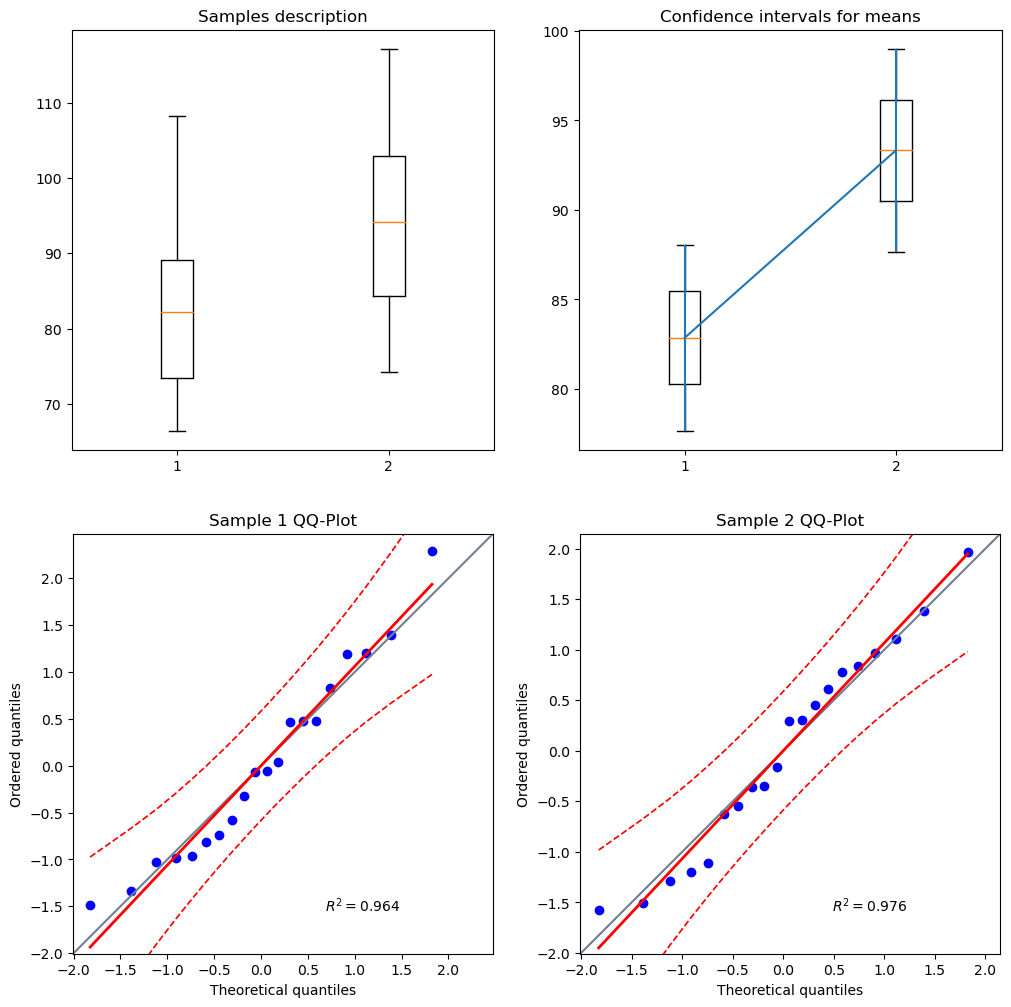

In [547]:
## two-sample t-test of independent variables (two-sided) - using random samples
import scipy.stats as sp
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import pingouin as pg

x_bar_1 = 89.9
x_bar_2 = 80.7
sd_1 = 11.3
sd_2 = 11.7
n_1 = 20
n_2 = 20

sample_2 = [rand.normalvariate(x_bar_1, sd_1) for i in range(n_1)]
sample_1 = [rand.normalvariate(x_bar_2, sd_2) for i in range(n_2)]

confidence = 0.95
alpha = 1-confidence


df = n_1 + n_2 - 2
t_se = np.sqrt((np.std(sample_1)**2 / n_1) + (np.std(sample_2)**2 / n_2))
t_stat = (np.mean(sample_1) - np.mean(sample_2)) / t_se
p = sp.t.sf(abs(t_stat), df) * 2

samples = [sample_1, sample_2]

#confidence intervals   
confidence_intervals = []
means = []
moe = []
for i in samples:
    n = len(i)
    mean = np.mean(i)
    t = abs(sp.t.ppf(alpha/2, n-1)) 
    se = np.std(i)/np.sqrt(n)
    margin_of_error = t * se
    conf = (mean - margin_of_error, mean + margin_of_error)
    confidence_intervals.append(conf)
    means.append(mean)
    moe.append(margin_of_error)
ci_1 = confidence_intervals[0]
ci_2 = confidence_intervals[1]


# check confidence intervals by built-in function
confidence_intervals = []
for i in samples:
    n = len(i)
    mean = np.mean(i)
    se = np.std(i)/np.sqrt(n)
    confidence_intervals.append(sp.t.interval(confidence, loc = mean, df = n-1, scale = se))
ci_1 = confidence_intervals[0]
ci_2 = confidence_intervals[1]


# print the results
print(f'Significance level (alpha): {alpha:.2f}')
print(f'\nSample 1. Mean = {np.mean(sample_1):.2f}, Standard deviation = {np.std(sample_1):.2f}, Observations = {len(sample_1)}')
print(f'Sample 2. Mean = {np.mean(sample_2):.2f}, Standard deviation = {np.std(sample_2):.2f}, Observations = {len(sample_2)}')
print('\nSample 1 normality check:')
display(pg.normality(sample_1))

print('Sample 2 normality check:')
display(pg.normality(sample_2))
print(f'\nt-statistics = {t_stat:.4f}')
print(f'p-value = {p:.4f}')
print(f'Uplift = {(np.mean(sample_2) - np.mean(sample_1)) / np.mean(sample_1) * 100:.2f} %')
if p <= alpha:
    print('\nWe can reject the null hypothesis')
else:
    print('\nWe can not reject the null hypothesis')
    
# check calculations by built-in function
print(sp.ttest_ind_from_stats(
    mean1=np.mean(sample_1), std1=np.std(sample_1), nobs1=len(sample_1),
    mean2=np.mean(sample_2), std2=np.std(sample_2), nobs2=len(sample_2))
    )    
    
print("\nSample 1 CI = {}, Sample 2 CI = {}".format(confidence_intervals[0], confidence_intervals[1]))
#print("\nSample 1 CI = {}, Sample 2 CI = {}".format(confidence_intervals[0], confidence_intervals[1]))


# plot the results
figure, axis = plt.subplots(2, 2, figsize=(12, 12))
ax1, ax2, ax3, ax4 = axis.flatten()

_ = ax1.set_title('Samples description')
_ = ax1.boxplot(samples)
_ = ax2.set_title('Confidence intervals for means')
_ = ax2.boxplot(confidence_intervals)
_ = ax2.errorbar(x=[1,2], y=means, yerr=moe)
_ = ax3.set_title('Sample 1 QQ-Plot')
plt.axes(ax3)
_ = pg.qqplot(sample_1, dist='norm')
_ = ax4.set_title('Sample 2 QQ-Plot')
plt.axes(ax4)
_ = pg.qqplot(sample_2, dist='norm')